In [8]:
#Importing required libraries
import os
import json
import tempfile
import requests
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

# as_supervised=True will return a tuple instead of a dictionary for image and label
# Load MNIST train and test dataset
(ds_train, ds_test), ds_info = tfds.load("mnist", split=['train', 'test'], with_info=True, as_supervised=True)

# Convert train dataset to a list and flatten images
train_list = [(np.ravel(image), label) for image, label in tfds.as_numpy(ds_train)]

# Separate into X_train and y_train
X_train, y_train = zip(*train_list)
X_train = np.vstack(X_train)
y_train = np.array(y_train)

# Similarly, process the test dataset
test_list = [(np.ravel(image), label) for image, label in tfds.as_numpy(ds_test)]
X_test, y_test = zip(*test_list)
X_test = np.vstack(X_test)
y_test = np.array(y_test)

epoch=10
batch_size=128 #Creating input data pipeline for train and test dataset
# Function to normalize the images
def normalize_img(image, label):
  #Normalizes images from uint8` to float32
  return tf.cast(image, tf.float32) / 255., label# Input data pipeline for test dataset
#Normalize the image using map function then cache and shuffle the #train dataset 
# Create a batch of the training dataset and then prefecth for 
#overlapiing image preprocessing(producer) and model execution work 
#(consumer)
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)# Input data pipeline for test dataset (No need to shuffle the test #dataset)
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(batch_size)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')  # Update to 10 units
])

#Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],)#Fit the model
model.fit(
    ds_train,
    epochs=epoch,
    validation_data=ds_test,
    verbose=2)

Epoch 1/10


2024-01-13 20:42:49.279773: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-13 20:42:49.439936: I external/local_xla/xla/service/service.cc:168] XLA service 0x7efe84329bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-13 20:42:49.439971: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-01-13 20:42:49.454855: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-13 20:42:49.487735: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1705196569.552757    3449 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 - 4s - loss: 0.3566 - accuracy: 0.9019 - val_loss: 0.2027 - val_accuracy: 0.9413 - 4s/epoch - 9ms/step
Epoch 2/10
469/469 - 2s - loss: 0.1656 - accuracy: 0.9531 - val_loss: 0.1404 - val_accuracy: 0.9581 - 2s/epoch - 4ms/step
Epoch 3/10
469/469 - 2s - loss: 0.1186 - accuracy: 0.9664 - val_loss: 0.1089 - val_accuracy: 0.9681 - 2s/epoch - 4ms/step
Epoch 4/10
469/469 - 2s - loss: 0.0930 - accuracy: 0.9730 - val_loss: 0.1017 - val_accuracy: 0.9693 - 2s/epoch - 4ms/step
Epoch 5/10
469/469 - 2s - loss: 0.0762 - accuracy: 0.9779 - val_loss: 0.0894 - val_accuracy: 0.9737 - 2s/epoch - 3ms/step
Epoch 6/10
469/469 - 2s - loss: 0.0624 - accuracy: 0.9821 - val_loss: 0.0841 - val_accuracy: 0.9748 - 2s/epoch - 3ms/step
Epoch 7/10
469/469 - 2s - loss: 0.0524 - accuracy: 0.9850 - val_loss: 0.0785 - val_accuracy: 0.9768 - 2s/epoch - 4ms/step
Epoch 8/10
469/469 - 2s - loss: 0.0438 - accuracy: 0.9876 - val_loss: 0.0764 - val_accuracy: 0.9778 - 2s/epoch - 3ms/step
Epoch 9/10
469/469 - 2s - loss: 0.0

In [9]:
MODEL_DIR='./tf_model'
version = "1"
export_path = os.path.join(MODEL_DIR, str(version))#Save the model 
model.save(export_path, save_format="tf")
print('\nexport_path = {}'.format(export_path))
!dir {export_path}

INFO:tensorflow:Assets written to: ./tf_model/1/assets


INFO:tensorflow:Assets written to: ./tf_model/1/assets



export_path = ./tf_model/1
assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [10]:
!saved_model_cli show --dir {export_path} --all

2024-01-13 20:43:52.536145: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-13 20:43:52.536196: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-13 20:43:52.536913: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-13 20:43:52.543836: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-13 20:43:53.300398: W tensorflow/compiler/tf2

In [17]:
import grpc
from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc
from tensorboard.compat.proto import types_pb2

In [18]:
channel = grpc.insecure_channel('127.0.0.1:8500')
stub = prediction_service_pb2_grpc.PredictionServiceStub(channel)

In [38]:
request = predict_pb2.PredictRequest()
request.model_spec.name = 'mnist'
request.inputs['flatten_input'].CopyFrom(tf.make_tensor_proto(X_test[0],dtype=types_pb2.DT_FLOAT,  shape=[28,28,1]))

In [33]:
!docker run -d -p 8500:8500 --mount type=bind,source=/home/blackitalian/ds_projects/tensorflow-deep-learning-cert/grpc/tf_model,target=/models/mnist/ -e MODEL_NAME=mnist -t tensorflow/serving


d17e4410497ce6f2153e944af99739da7556edc27a950a03ec95caad3e5d2a27


In [39]:
result=stub.Predict(request, 10.0)
result

outputs {
  key: "dense_1"
  value {
    dtype: DT_FLOAT
    tensor_shape {
      dim {
        size: 1
      }
      dim {
        size: 10
      }
    }
    float_val: 0.0
    float_val: 0.0
    float_val: 1.0
    float_val: 0.0
    float_val: 0.0
    float_val: 0.0
    float_val: 0.0
    float_val: 0.0
    float_val: 0.0
    float_val: 0.0
  }
}
model_spec {
  name: "mnist"
  version {
    value: 1
  }
  signature_name: "serving_default"
}

In [41]:
res=np.argmax(result.outputs['dense_1'].float_val)
print(" predicted output :", res)

 predicted output : 2


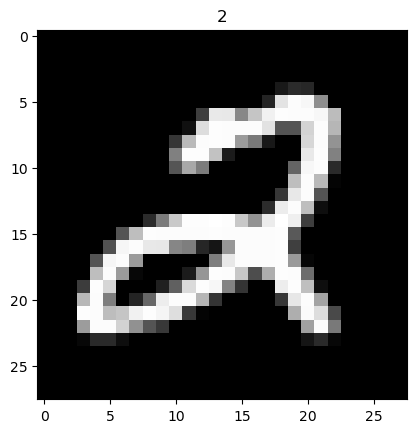

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
img = X_test[0].reshape(28,28)
plt.title(res)
plt.imshow(img, cmap="gray")